# ERT simulation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert

### Invert 

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f3b15ec3a90>)

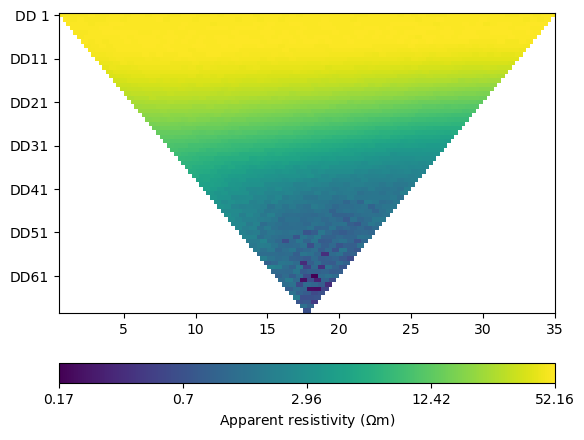

In [14]:
#mgr = ert.ERTManager('simple.dat')
data= pg.load('data/ERTLine_f.dat')
ert.showData(data, cMap='viridis')

In [7]:
xz = np.load('models/boundary.npy')

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f3b340cf5d0>)

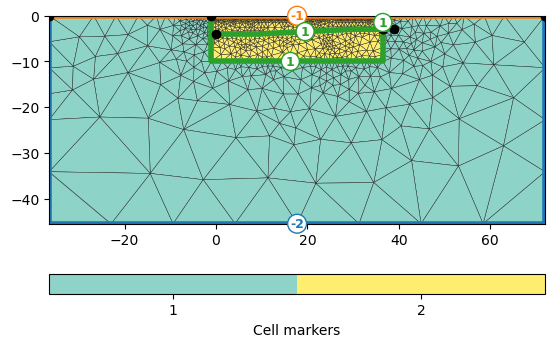

In [8]:
plc = mt.createParaMeshPLC(data, paraDepth=10, boundary=1)
line = mt.createPolygon(xz, marker=1)
plc += line
mesh = mt.createMesh(plc, quality=34.3)
pg.show(mesh, markers=True, showMesh=True)

20/04/24 - 22:13:25 - pyGIMLi - INFO - Found 2 regions.
20/04/24 - 22:13:25 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
20/04/24 - 22:13:25 - pyGIMLi - INFO - Creating forward mesh from region infos.
20/04/24 - 22:13:26 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
20/04/24 - 22:13:26 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4770 Cells: 9156 Boundaries: 7058
20/04/24 - 22:13:26 - pyGIMLi - INFO - Use median(data values)=20.2631430997752
20/04/24 - 22:13:26 - pyGIMLi - INFO - Created startmodel from forward operator: 1737, min/max=20.263143/20.263143
20/04/24 - 22:13:26 - pyGIMLi - INFO - Starting inversion.


min/max(dweight) = 1.27249/99.9981
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7f3b3444b1a0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x7f3b3444b4c0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x7f3b3444b3d0>
min/max (data): 0.17/52.16
min/max (error): 1%/78.59%
min/max (start model): 20.26/20.26
--------------------------------------------------------------------------------
Calculating response for model: min = 20.2631 max = 20.2631
Allocating memory for primary potential...... 0.0606417

No primary potential for secondary field calculation. Calculating analytically...
Forward: time: 1.99267s
Response: min = 20.203 max = 20.2895 mean = 20.2582
Reciprocity rms(modelReciprocity) 0%, max: 0%
min/max(dweight) = 1.27249/99.9981
Building constraints matrix
constraint matrix of size(nBounds x nModel) 2511 x 1737
check Jacobian: wrong dimensions: (0x0) should be (2415x1737)  force: 1
jacobian size invalid, forced recalc: 1
Calculating 

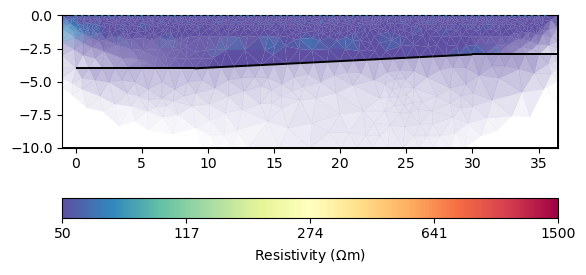

In [9]:
mgr = ert.Manager(data)
mgr.setMesh(mesh)
mgr.invert(verbose=False)


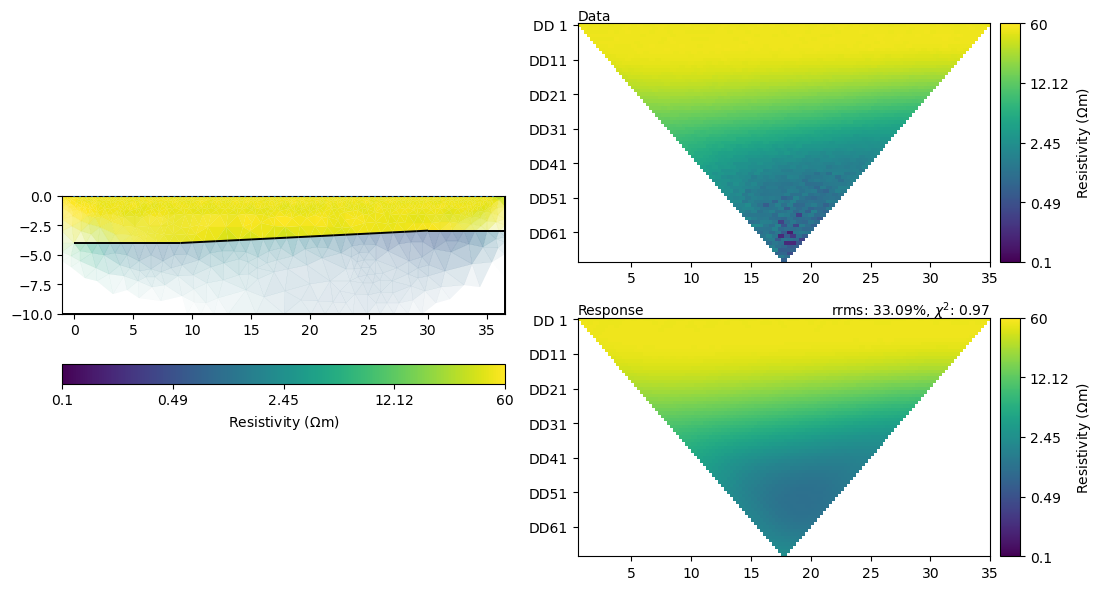

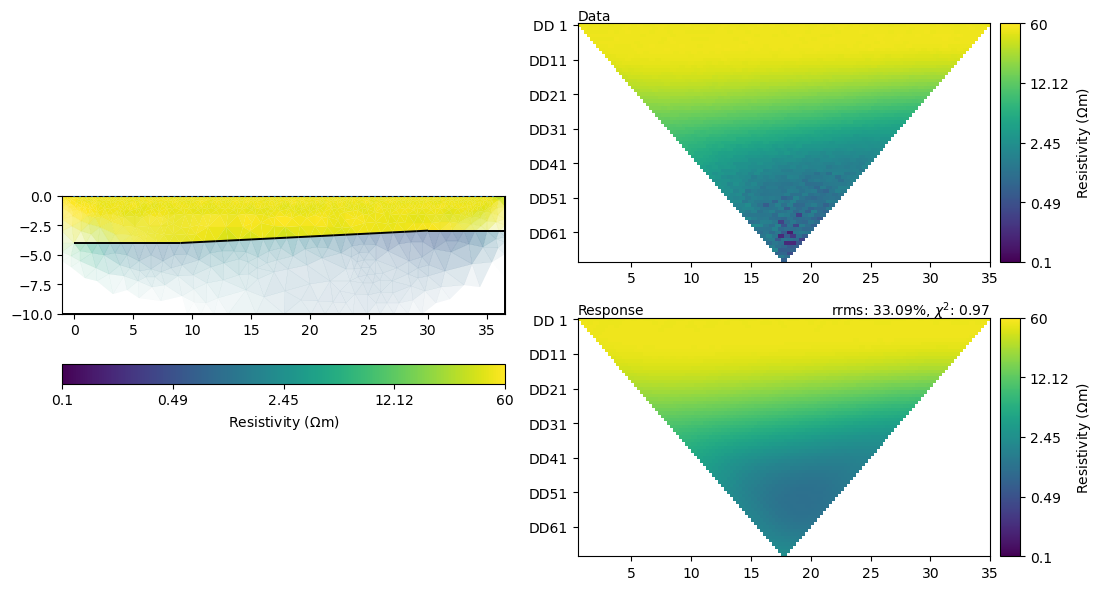

In [13]:
mgr.showResultAndFit(cMin=0.1, cMax=60, cMap='viridis')